In [0]:
# !pip install fastai==0.7.0
# import sys
# !{sys.executable} -m pip install torchtext==0.2.3
# !pip install torch==0.4

In [0]:
# !curl 'https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar' -o 'VOCtrainval_06-Nov-2007.tar' -H 'Connection: keep-alive' -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'Upgrade-Insecure-Requests: 1' -H 'DNT: 1' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3735.0 Safari/537.36' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3' -H 'Accept-Encoding: gzip, deflate, br' -H 'Accept-Language: en-GB,en;q=0.9,en-US;q=0.8,bn;q=0.7' -H 'Cookie: __utmc=134107727; __utmz=134107727.1553054465.2.2.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); __utma=134107727.205412972.1553047529.1553054465.1553930584.3; __utmt=1; __utmb=134107727.1.10.1553930584' --compressed

# !curl 'https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar' -o 'VOCtest_06-Nov-2007.tar' -H 'Connection: keep-alive' -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'Upgrade-Insecure-Requests: 1' -H 'DNT: 1' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3735.0 Safari/537.36' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3' -H 'Accept-Encoding: gzip, deflate, br' -H 'Accept-Language: en-GB,en;q=0.9,en-US;q=0.8,bn;q=0.7' -H 'Cookie: __utmc=134107727; __utmz=134107727.1553054465.2.2.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); __utma=134107727.205412972.1553047529.1553054465.1553930584.3; __utmt=1; __utmb=134107727.1.10.1553930584' --compressed

# !curl https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip -o PASCAL_VOC.zip

In [0]:
# !tar -xvf VOCtrainval_06-Nov-2007.tar

# !tar -xvf 'VOCtest_06-Nov-2007.tar'

# !unzip PASCAL_VOC.zip

In [0]:
# !mv VOCdevkit PASCAL_VOC

In [5]:
!ls PASCAL_VOC

pascal_test2007.json   pascal_train2012.json  pascal_val2012.json
pascal_train2007.json  pascal_val2007.json    VOCdevkit


## Code Start

In [0]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
from json import *
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

In [10]:
PATH = Path('PASCAL_VOC/')
list(PATH.iterdir())

[PosixPath('PASCAL_VOC/pascal_train2012.json'),
 PosixPath('PASCAL_VOC/pascal_val2012.json'),
 PosixPath('PASCAL_VOC/pascal_test2007.json'),
 PosixPath('PASCAL_VOC/VOCdevkit'),
 PosixPath('PASCAL_VOC/pascal_train2007.json'),
 PosixPath('PASCAL_VOC/pascal_val2007.json')]

In [14]:
trn_js = json.load((PATH/'pascal_train2007.json').open())
trn_js.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [15]:
IMAGES, ANNOTATIONS, CATEGORIES = 'images', 'annotations', 'categories'

trn_js[IMAGES][:2]

[{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500},
 {'file_name': '000017.jpg', 'height': 364, 'id': 17, 'width': 480}]

In [16]:
trn_js[ANNOTATIONS][:2]

[{'area': 34104,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0,
  'image_id': 12,
  'iscrowd': 0,
  'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]},
 {'area': 13110,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]]}]

In [17]:
trn_js[CATEGORIES][:2]

[{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'none'}]

In [0]:
FILE_NAME, ID, CAT_ID, IMG_ID, BBOX, NAME = 'file_name', 'id', 'category_id', 'image_id', 'bbox', 'name'

cats = {o[ID]: o[NAME] for o in trn_js[CATEGORIES]}
trn_fns = {o[ID]: o[FILE_NAME] for o in trn_js[IMAGES]}
trn_ids = [o[ID] for o in trn_js[IMAGES]]

In [21]:
list((PATH/'VOCdevkit'/'VOC2007').iterdir())

[PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/ImageSets'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/Annotations'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/SegmentationObject'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/SegmentationClass')]

In [0]:
JPEGS = 'VOCdevkit/VOC2007/JPEGImages'
IMG_PATH = PATH/JPEGS

In [26]:
list((IMG_PATH).iterdir())[:4]

[PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages/002272.jpg'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages/005773.jpg'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages/001483.jpg'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages/009104.jpg')]

In [27]:
im0_d = trn_js[IMAGES][0]
im0_d[FILE_NAME], im0_d[ID]

('000012.jpg', 12)

In [0]:
hw_bb = lambda bb: np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])
bb_hw = lambda a: np.array([a[1], a[0], a[3]-a[1]+1, a[2]-a[0]+1])

In [0]:
trn_anno = collections.defaultdict(lambda: [])
for o in trn_js[ANNOTATIONS]:
  if not o['ignore']:
    bb = o[BBOX]
    bb = hw_bb(bb)
    trn_anno[o[IMG_ID]].append((bb, o[CAT_ID]))

In [33]:
len(trn_anno)

2501

In [84]:
im_a = trn_anno[im0_d[ID]]; im_a

[(array([ 96, 155,  79,  42]), 7)]

In [85]:
im0_a = im_a[0]; im0_a

(array([ 96, 155,  79,  42]), 7)

In [86]:
cats[7]

'car'

In [87]:
trn_anno[17]

[(array([ 61, 184,  78, -88]), 15), (array([ 77,  89, 183, 226]), 13)]

In [88]:
cats[15], cats[13]

('person', 'horse')

In [0]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

In [90]:
f'expected: {bb_voc}, fastai: {bb_fastai}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], fastai: [ 96 155 269 350], actual: [155  96 196 174]'

In [0]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])

In [0]:
def show_image(im, figsize=None, ax=None):
  if not ax:
    fig, ax = plt.subplots(figsize=figsize)
  ax.imshow(im)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  return ax

In [0]:
def draw_outline(o, lw):
  o.set_path_effects([patheffects.Stroke(
  linewidth=lw, foreground='black'), patheffects.Normal()
  ])

In [0]:
def draw_rect(ax, b):
  patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
  draw_outline(patch, 4)

In [0]:
def draw_text(ax, xy, txt, sz=14):
  text = ax.text(*xy, txt, verticalalignment='top', color='white', fontsize=sz, weight='bold')
  draw_outline(text, 1)

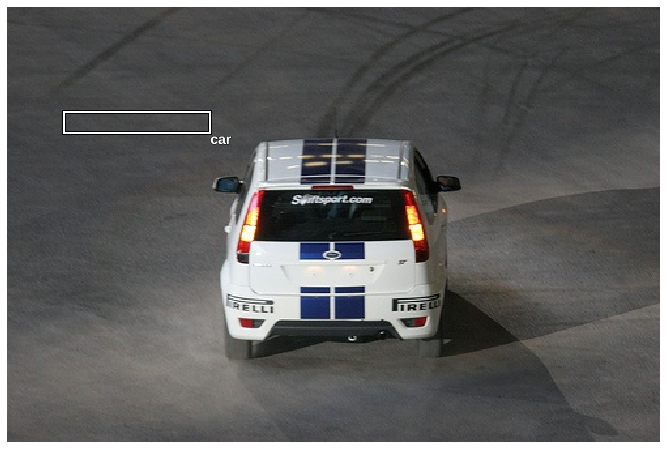

In [96]:
ax = show_image(im, figsize=(16, 8))
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [0]:
def draw_image(im, ann):
  ax = show_image(im, figsize=(16, 8))
#   import pdb; pdb.set_trace()
  for b, c in ann:
    b = bb_hw(b)
    draw_rect(ax, b)
    draw_text(ax, b[:2], cats[c], sz=16)

In [0]:
def draw_idx(trn_anno, idx):
  im_a = trn_anno[idx]
  im = open_image(IMG_PATH/trn_fns[idx])
  print(im.shape)
  draw_image(im, im_a)

(364, 480, 3)


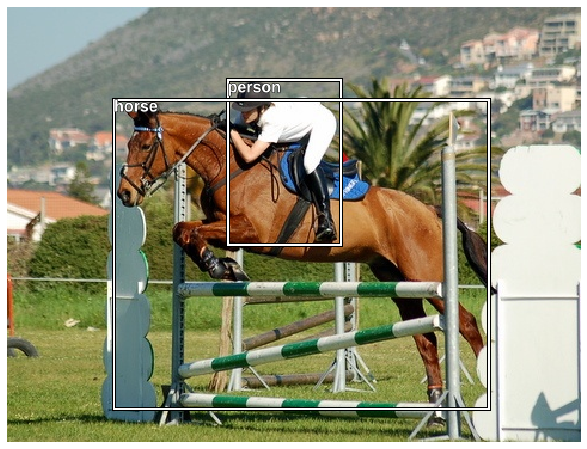

In [127]:
draw_idx(trn_anno, 17)

(371, 500, 3)


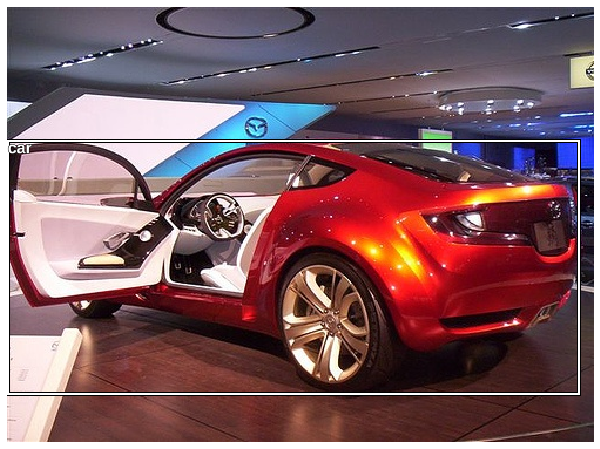

In [128]:
draw_idx(trn_anno, trn_ids[27])

In [0]:
def get_lrg(b):
  if not b:
    raise Exception()
  b = sorted(b, key=lambda x: np.product(x[0][-2:] - x[0][:2]), reverse=True)
  return np.array([b[0]])

In [0]:
trn_lrg_anno = {k: get_lrg(v) for k, v in trn_anno.items()}

(500, 334, 3)


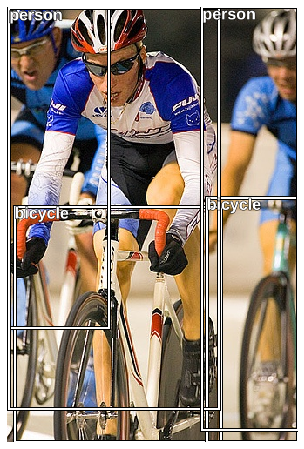

In [142]:
draw_idx(trn_anno, 23)

(500, 334, 3)


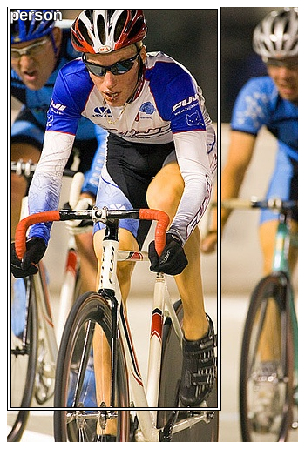

In [141]:
draw_idx(trn_lrg_anno, 23)

In [0]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [0]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
                   'cats': [cats[trn_lrg_anno[o][0][1]] for o in trn_ids]},
                   columns=['fn', 'cats'])
df.to_csv(CSV, index=False)

In [151]:
df.head()

fn       cats
0  000012.jpg        car
1  000017.jpg      horse
2  000023.jpg     person
3  000026.jpg        car
4  000032.jpg  aeroplane

## Create the Model

In [0]:
f_model = resnet34
sz=224
bs=64

In [0]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms, bs=bs)

In [0]:
x, y = next(iter(md.val_dl))

In [160]:
x.shape, y.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

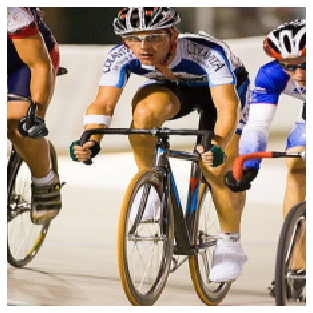

In [163]:
show_image(md.val_ds.denorm(to_np(x))[0]);

In [189]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])
learn.opt_fn = optim.Adam

/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [190]:
learn.lr_find()

 91%|█████████ | 29/32 [00:19<00:01,  2.39it/s, loss=12.9]

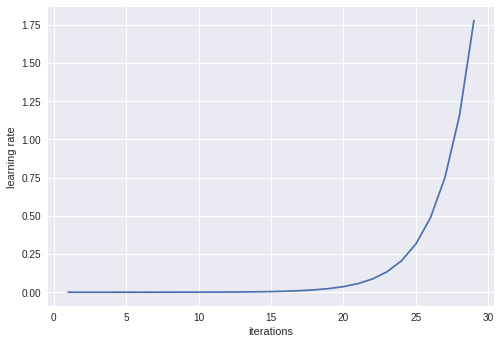

In [191]:
learn.sched.plot_lr()

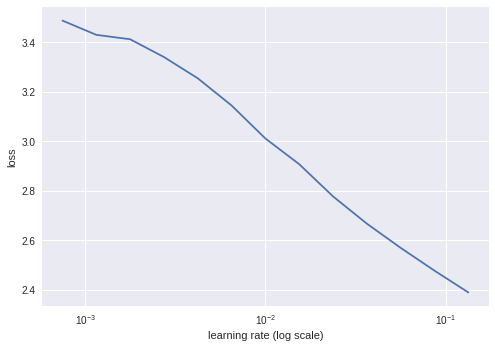

In [192]:
learn.sched.plot()

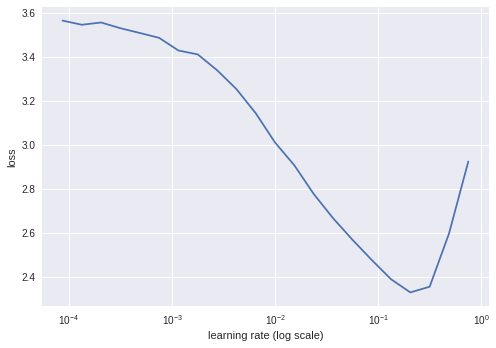

In [193]:
learn.sched.plot(n_skip=5, n_skip_end=1)

In [0]:
lr = 2e-2

In [195]:
learn.fit(lr, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.300106   0.640405   0.8       


[0.6404051995277404, 0.8000000009536743]

In [0]:
lrs = np.array([lr/1000, lr/100, lr])

In [0]:
learn.freeze_to(-2)

In [198]:
learn.fit(lrs/5, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.809682   0.584758   0.814     


[0.5847581038475037, 0.8139999976158142]

In [0]:
learn.unfreeze()

In [200]:
learn.fit(lrs/5, 1, cycle_len=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.632398   0.564798   0.82      
    1      0.456291   0.565499   0.832     


[0.5654991047382355, 0.8319999976158142]

## Look At the Result

In [0]:
x, y = next(iter(md.val_dl))
probs = F.softmax(predict_batch(learn.model, x), -1)
x, preds = to_np(x), to_np(probs)
preds = np.argmax(preds, -1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


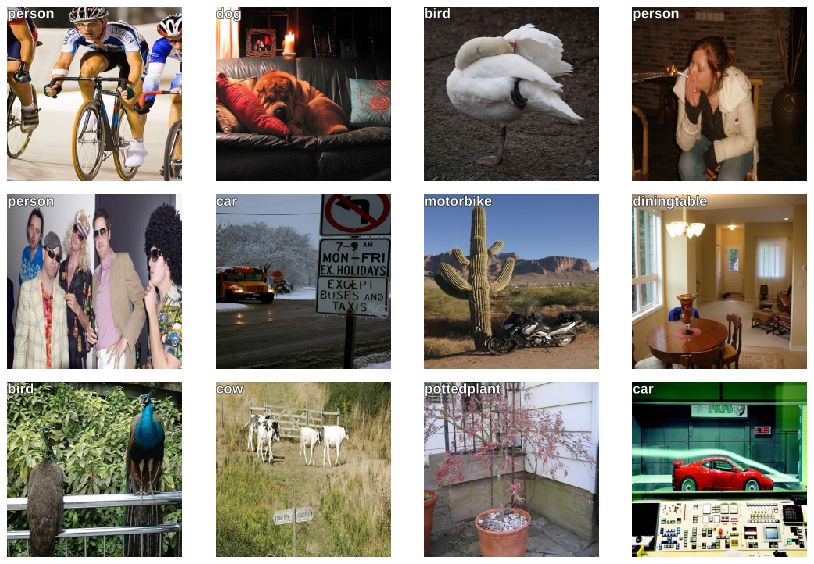

In [203]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
  ima=md.val_ds.denorm(x)[i]
  b = md.classes[preds[i]]
  ax = show_image(ima, ax=ax)
  draw_text(ax, (0, 0), b)
plt.tight_layout()